# Empalme on la clase anterior.




Con el mismo razocinio del metodo de matrices encontramos que

$$\gamma < \frac12 $$
para estabilidad.

Hay otras herramientas para estabilidad
* Analisis de equivalencia Lax: Relaciona estabilidad con convergencia
* Analisis de energia: Verifica estabilidad con normas de energia.
Estos dos metodos estan por fuera del alcance de este curso.

**Ejemplo 2.3.1**: Halle la soluci'on num'erica de la siguiente ecuacion de calor y compare con la solucion analitica (que la mostramos enseguida).
Estudie la estabilidad del sistema (use `Python`).

\begin{eqnarray}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} &=& 0
 \quad , \quad \text{ecuacion diferencial de calor} \\
 u(x,0) &=& f(x) \quad  , \quad \text{condicion inicial} \\
 u(0,t) &=& 0 \quad , u(L,t) = 0  \quad , \quad \text{condiciones de frontera}  \\
 f(x) &=& 6 \sin \left (  \frac{\pi x}{L}\right )
\end{eqnarray}
La solucion, usando el m'etodo de separacion de variables es

$$u(x,t) = 6 \sin \left (  \frac{\pi x}{L} \right ) \mathrm{e}^{-\frac{1}{\alpha} \left ( \frac{\pi}{L} \right )^2 t}  $$


Asuma $L=1$, $\alpha=1$.



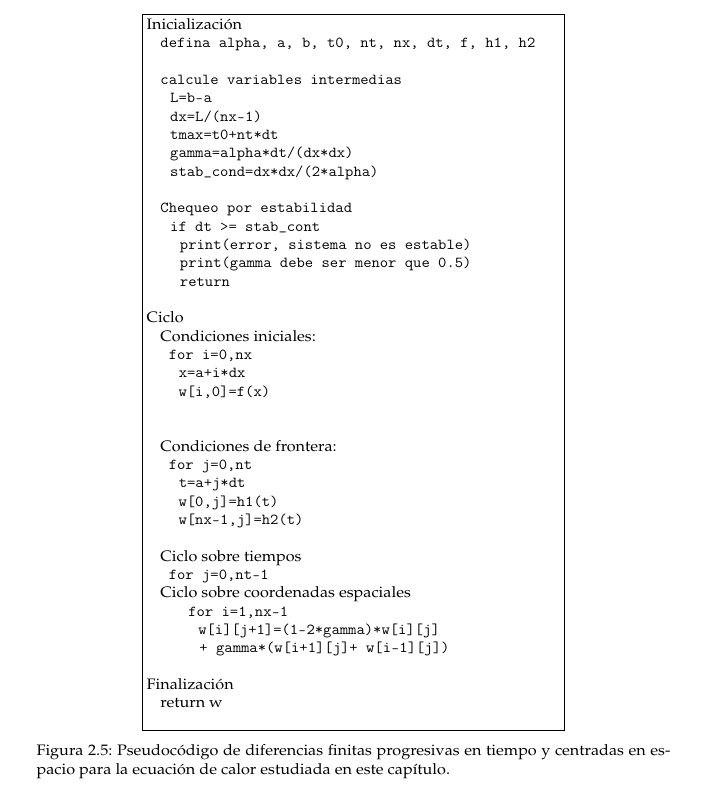

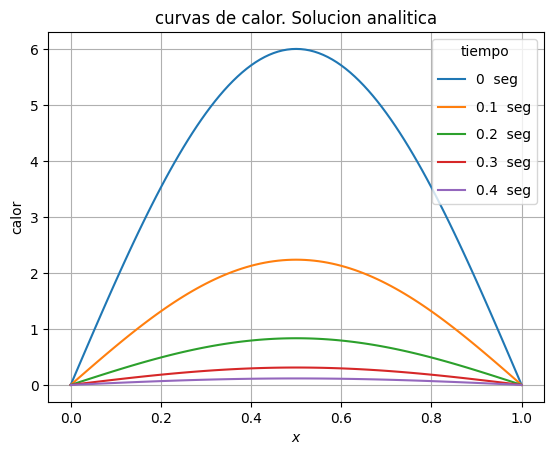

In [ ]:
# Solucion analitica
import numpy as np
import matplotlib.pyplot as plt

alpha=1
a=0
b=1
nx=101
X = np.linspace(a,b,nx)
L=b-a

def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp(-(1.0/alpha)*(np.pi/L)**2*t)


# tiempos
t0=0
dt=0.1
t=t0

params = {'legend.fontsize':5, 'legned.handlength':1}

# labels
plt.xlabel(r"$x$")
plt.ylabel(r"calor")
plt.title(r"curvas de calor. Solucion analitica")

nP=5
for i in range(nP):
    plt.plot(X, u(X,t), label=str(round(t,1)) +   '  seg')
    plt.legend(labelspacing=1, title='tiempo')
    t += dt

plt.grid(True)
plt.show()

In [ ]:
# solucion numerica
def solu_eq_calor(alpha, a,b, t0, nt, nx, dt, f):
    L = b-a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond=dx**2/(2*alpha)

    # chequeo de estabilidad
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada")
        print(f" dt={dt} > dx^2/(2*alpha)={stab_cond}")
        return

    tmax = t0 + nt*dt
    t=np.arange(t0, tmax, dt)

    # inicializamos la matriz w
    w = np.zeros((nx, nt))
    x = np.linspace(a,b, w.shape[0])

    print(f"dimensiones de w: {w.shape}")

    #condicion inicial
    for i in range(w.shape[0]):
        w[i,0] = f(x[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = 0
        w[-1,j] = 0 # w[nx-1,j]=0

    # solucion
    # ciclo sobre tiempos
    for j in range(0, nt-1):
        # ciclo sobre espacio
        for i in range(1, nx-1):
            w[i,j+1] = (1 -2* gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])

    return w


## Prueba

In [ ]:
alpha=1
a=0
b=1
t0=0
nt=2
nx=101
dt=0.1
L=b-a

# condicion inicial
def f(x):
    return 6*np.sin(np.pi*x/L)

solu_eq_calor(alpha, a,b, t0, nt, nx, dt, f)

error: la condicion de estabilidad fue violada
 dt=0.1 > dx^2/(2*alpha)=5e-05


In [ ]:
# escojamos un dt< 5e-05
dt = 0.00001
nt = 40001

w = solu_eq_calor(alpha, a,b, t0, nt, nx, dt, f)

dimensiones de w: (101, 40001)


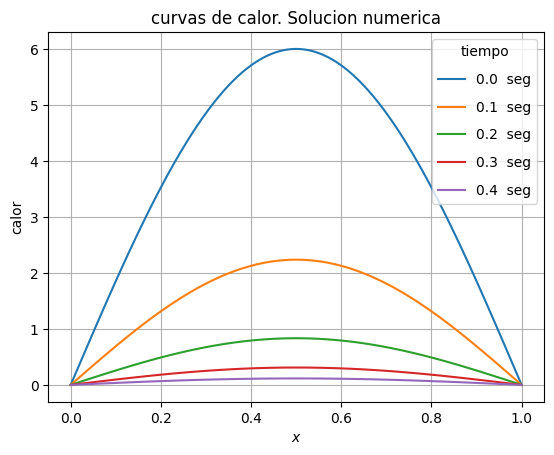

In [ ]:
# graficamos las soluciones
params={'legend.fontsize':5, 'legend.handlength':1}

# labels
plt.xlabel(r"$x$")
plt.ylabel(r"calor")
plt.title(r"curvas de calor. Solucion numerica")

# definimos el dominio
X =np.linspace(a,b,w.shape[0])

# ciclo con 5 graficas
for j in range(0,nt,10000):
    t = j*dt
    plt.plot(X, w[:,j], label=str(round(t,1)) +   '  seg')
    plt.legend(labelspacing=1, title='tiempo')

plt.grid(True)
plt.show()

Antes de graficar el error, vamos a hacer una animacion

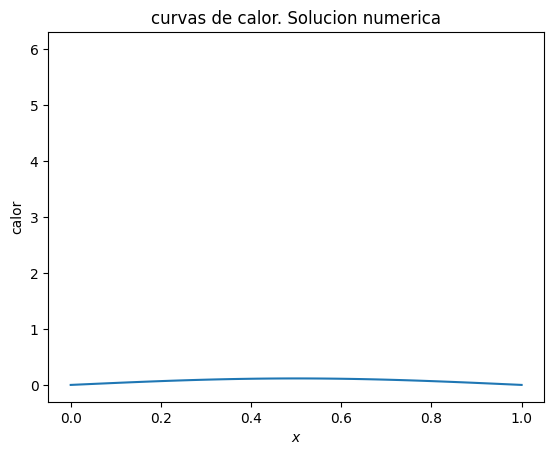

In [ ]:
# do animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# domain
X = np.linspace(a,b, w.shape[0])

# figure
fig , ax = plt.subplots()
line, = ax.plot(X, w[:,0])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"calor")
ax.set_title(r"curvas de calor. Solucion numerica")

def init():
    line.set_data([],[])
    return (line,)

# update animation
def update(j):
    line.set_data(X, w[:,j])
    return (line,)

anim = FuncAnimation(fig, update, frames=np.arange(0, nt, 1000),
                               init_func=init, blit=True)

anim.save('calor.gif', writer='pillow')
plt.show()

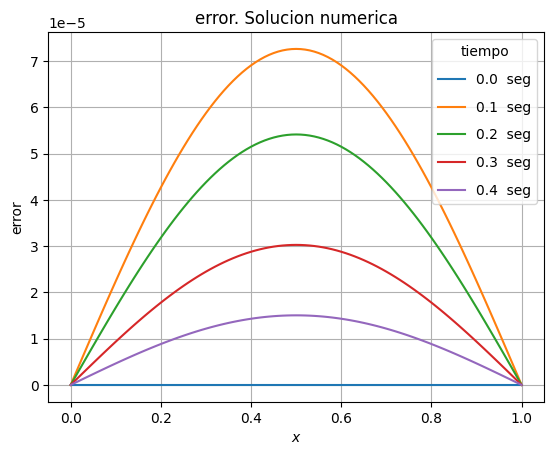

In [ ]:
# error
nt=40001
dt=0.00001
Nt=int(nt/10000) + 1
dx=(b-a)/(nx-1)

# inicializamos en ceros
error = np.zeros((nx,Nt))
k=0

# ciclo
for j in range(0,nt,10000):
    t = j*dt
    for i in range(nx):
        x = i*dx
        error[i,k] = w[i,j]-u(x,t)
    k +=1

# graficamos el error
params={'legend.fontsize':5, 'legend.handlength':1}

# labels
plt.xlabel(r"$x$")
plt.ylabel(r"error")
plt.title(r"error. Solucion numerica")

# dominio
X = np.linspace(0, L, w.shape[0])
Dt=0.1
for j in range(0,Nt):
    t = j*Dt
    plt.plot(X, error[:,j], label=str(round(t,1)) +   '  seg')
    plt.legend(labelspacing=1, title='tiempo')

plt.grid(True)
plt.show()

# Veamos ejemplos donde se viola la estabilidad

In [ ]:
# solucion numerica
def solu_eq_calor(alpha, a,b, t0, nt, nx, dt, f):
    L = b-a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond=dx**2/(2*alpha)

    # chequeo de estabilidad
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada")
        print(f" dt={dt} > dx^2/(2*alpha)={stab_cond}")
        # return

    tmax = t0 + nt*dt
    t=np.arange(t0, tmax, dt)

    # inicializamos la matriz w
    w = np.zeros((nx, nt))
    x = np.linspace(a,b, w.shape[0])

    print(f"dimensiones de w: {w.shape}")

    #condicion inicial
    for i in range(w.shape[0]):
        w[i,0] = f(x[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = 0
        w[-1,j] = 0 # w[nx-1,j]=0

    # solucion
    # ciclo sobre tiempos
    for j in range(0, nt-1):
        # ciclo sobre espacio
        for i in range(1, nx-1):
            w[i,j+1] = (1 -2* gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])

    return w


Desenho prueba con $\gamma=0.5, 1.5, 15 $

In [ ]:
from os import TMP_MAX
# gamma = 0.5, 1.5
# obtenga el tiempo de dx, gamma y alpha
# ecuaciones de las notas de clase
def getdt(gamma, dx, alpha):
    return gamma*dx**2/(2*alpha)

def ploterror(gammaarray, alpha, L, nx):
    params={'legend.fontsize':5, 'legend.handlength':1}

    # labels
    plt.xlabel(r"$x$")
    plt.ylabel(r"error")
    plt.title(r" Curvas de calor. Solucion numerica")
    tmax=0.1

    dx = L/(nx-1)
    for gamma in gammaarray:
        dt = getdt(gamma, dx, alpha)
        nt = int(tmax/dt)
        w = solu_eq_calor(alpha, a,b, t0, nt, nx, dt, f)

        # graficamos
        X = np.linspace(0, L, w.shape[0])
        # un salto
        nskip = max(1, int(nt/3)) # graficamos 3 curvas
        for j in range(0,nt,nskip):
            t = j*dt
            plt.plot(X, w[:,j], label=str(round(t,1)) +   '  seg')

        # limpiar w
        w = np.zeros((nx,nt))

    plt.legend(labelspacing=1, title='tiempo')
    plt.grid(True)
    plt.show()


dimensiones de w: (101, 4000)
error: la condicion de estabilidad fue violada
 dt=7.500000000000001e-05 > dx^2/(2*alpha)=5e-05
dimensiones de w: (101, 1333)


/tmp/ipython-input-2768344819.py:37: RuntimeWarning: overflow encountered in scalar add
  w[i,j+1] = (1 -2* gamma)*w[i,j] + gamma*(w[i+1,j] + w[i-1,j])


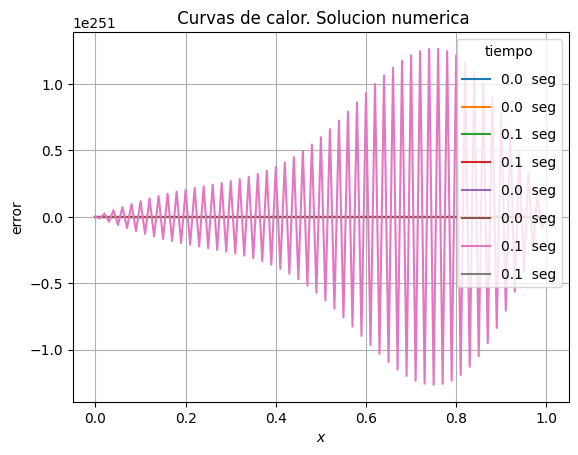

In [ ]:
# probamos
alpha=1
L=b-a
nx=101
gammaarray=[0.5, 1.5]

# graficamos la solucion
ploterror(gammaarray, alpha, L, nx)

error: la condicion de estabilidad fue violada
 dt=0.00075 > dx^2/(2*alpha)=5e-05
dimensiones de w: (101, 133)


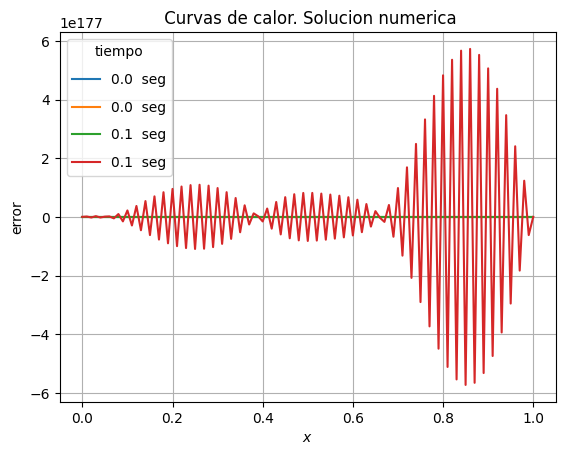

In [ ]:
gammaarray=[15]
ploterror(gammaarray, alpha, L, nx)
#

# Hoy vemos
* condiciones de frontera de Neumann (Karl)
* fuente $g(x,t) \ne 0$.
* $\alpha$ variable


# Condiciones de frontera de Neumann (Karl)
El problema es:

$$\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2}  = 0  $$

$$u(x, t_0=c) = I_0(x) \quad , \quad \text{condicion inicial} $$

$$ \frac{\partial }{\partial x } u(a,t) = h_1(t) \quad , \quad  
 \frac{\partial }{\partial x } u(b,t) = h_2(t) \quad , \quad \text{condiciones de frontera Neumann}$$

Recordemos de la clase 6
$$w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma (w_{i+1 j} + w_{i-1 j}) \tag{1} $$

Si $\partial u/\partial x = 0$ en los bordes, se llama **aislamiento termico**.
Esto lo debemos programar para $i=1,2, \cdots, nx-1$.

El problema es el siguiente

* $i=1$. Necesitariamos $w_{0j}$ (al final de la ecuacion) y tenemos nada para $w_{0j}$. Como  obtenemos este valor?

De la derivada central y la condicion de borde en $a$, en $i=1$

$$ \frac{w_{2j} - w_{0j}}{2 \Delta x} = h_1(j \Delta t) + \mathcal{O}(
    \Delta x^2) $$


de ac'a despejamos $w_0$.
$$w_{2j} - w_{0j} = 2 \Delta x h_1(j \Delta t) $$
De aca que

$$ w_{0j} = w_{2j} - 2 h_1(j \Delta t) \Delta x \tag{2} $$

* $i=n-1$. En la expresion (1) para el caso $w_{i+1 j}$ tendriamos
$w_{n j}$ pero esta no la tenemos. Tenemos la derivada en $i=n-1$ y usando diferencias finitas centradas como en el caso anterior tenemos

$$ \frac{w_{n j} - w_{n-2 j}}{2 \Delta x} = h_2(j \Delta t) + \mathcal{O}(\Delta x^2) $$

De ac'a despejamos $w_{nj}$

$$w_{nj} - w_{n-2 j} \approx 2 \Delta x h_2(j \Delta t) $$
y


$$w_{nj} = w_{n-2 j}  + 2 \Delta x h_2(j \Delta t) $$

Podemos ahora evaluar las diferencias finitas en $i=1, i=n-1$

* $i=1$

$$w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma (w_{i+1 j} + w_{i-1 j})  $$

$$w_{1 j+1} = (1 - 2 \gamma) w_{1j} + \gamma (w_{i+1 j} + w_{0 j})  $$

De la Ecuacion (2)
$$w_{1 j+1} = (1 - 2 \gamma) w_{1j} + \gamma (w_{2 j} +
w_{2j} - 2 h_1(j \Delta t) \Delta x )  $$

$$w_{1 j+1} = (1 - 2 \gamma) w_{1j} + \gamma (2 w_{2 j}  
 - 2 h_1(j \Delta t) \Delta x )  $$

$$w_{1 j+1} = (1 - 2 \gamma) w_{1j} + 2 \gamma ( w_{2 j}  
 - h_1(j \Delta t) \Delta x )  $$

* $i=n-1$.


$$w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma (w_{i+1 j} + w_{i-1 j})  $$
$$w_{n-1 j+1} = (1 - 2 \gamma) w_{n-1 j} + \gamma (w_{n j} + w_{n-2 j})  $$

pero
$$w_{nj} = w_{n-2 j}  + 2 \Delta x h_2(j \Delta t) $$

Entonces
$$w_{n-1 j+1} = (1 - 2 \gamma) w_{n-1 j} + \gamma (
   w_{n-2 j}  + 2 \Delta x h_2(j \Delta t)  + w_{n-2 j})  $$

$$w_{n-1 j+1} = (1 - 2 \gamma) w_{n-1 j} + \gamma (
   2 w_{n-2 j}  + 2 \Delta x h_2(j \Delta t)  )  $$

$$w_{n-1 j+1} = (1 - 2 \gamma) w_{n-1 j} + 2 \gamma (
    w_{n-2 j}  +  \Delta x h_2(j \Delta t)  )  $$

    
Podemos escribir el sistema en forma matricial.

$$ \begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots \\
\vdots \\
w_{n-1 j+1} \\
\end{pmatrix}  
=
\begin{pmatrix}
1 - 2 \gamma & \gamma & 0 & \cdots  & 0 \\
\gamma & 1 - 2 \gamma & \gamma & \ddots & \vdots  \\
0  & \ddots  & \ddots  & \ddots & \vdots  \\
0  & \ddots  & \ddots  & \ddots & \vdots  \\
0 & \cdots & \cdots & \gamma & 1 - 2 \gamma
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\
w_{2j} \\
\vdots \\
\vdots \\
w_{n-1 j}
\end{pmatrix}
+
\gamma
\begin{pmatrix}
 2 w_{2 j}  - 2 h_1(j \Delta t) \Delta x  \\
 0 \\
\vdots \\
\vdots \\
0 \\
 2  
    w_{n-2 j}  +  2 \Delta x h_2(j \Delta t)  
\end{pmatrix}
$$








# Evaluacion de la ecuacion calor con fuente.
La ecuacion de calor cuando se discretiza es FTCS

$$\frac{w_{i j+1}-w_{ij}}{k} - \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j} }{h^2} = g_{ij} $$

De aca toca despejar $w_{i j+1}$
$k=\Delta t$

$$w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma( w_{i+1 j} + w_{i-1 j}) + \Delta t g_{ij}  $$

Dejo como ejercicio construir la forma matricial

$$ \begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots \\
\vdots \\
w_{n-1 j+1} \\
\end{pmatrix}  
=
\begin{pmatrix}
1 - 2 \gamma & \gamma & 0 & \cdots  & 0 \\
\gamma & 1 - 2 \gamma & \gamma & \ddots & \vdots  \\
0  & \ddots  & \ddots  & \ddots & \vdots  \\
0  & \ddots  & \ddots  & \ddots & \vdots  \\
0 & \cdots & \cdots & \gamma & 1 - 2 \gamma
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\
w_{2j} \\
\vdots \\
\vdots \\
w_{n-1 j}
\end{pmatrix}
+
\gamma
\begin{pmatrix}
 2 w_{2 j}  - 2 h_1(j \Delta t) \Delta x  \\
 0 \\
\vdots \\
0 \\
 2  
    w_{n-2 j}  +  2 \Delta x h_2(j \Delta t)  
\end{pmatrix}
+
\Delta t
\begin{pmatrix}
g_{1j} \\
g_{2j} \\
\vdots \\
g_{n-1 j}
\end{pmatrix}
$$

# Ecuacion de calor con $\alpha$ variable
En este caso, la ecuacion de calor es

$$
\frac{\partial u}{\partial t} - \frac{\partial}{\partial x} \left [ \alpha(x) \frac{\partial u}{\partial x}  \right ] = g(x,t)
$$

Podemos aplicar la deriva del producto

$$\frac{\partial u}{\partial t} - \alpha(x) \frac{\partial^2 u}{\partial x^2} - \frac{\partial \alpha(x)}{\partial x} \frac{\partial u}{\partial x} = g(x,t) $$

La diferencia con $\alpha$ constante esta en el tercer termino. Si $\alpha$ es constante el tercer termino es 0.

Diferencias finitas

$$\frac{\partial u}{\partial t} = \frac{w_{i j+1} - w_{ij}}{\Delta t} + \mathcal{O}(\Delta t)$$

Para el termino de la derecha

$$\alpha_i \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}
- \frac{\alpha_{i+1} - \alpha_{i-1}}{2 \Delta x} \frac{w_{i+1 j} - w_{i-1 j}}{2 \Delta x}$$

de forma que

$$\frac{w_{i j+1} - w_{i j}}{\Delta t} =
\alpha_i \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}
- \frac{(\alpha_{i+1} - \alpha_{i-1})(w_{i+1 j} - w_{i-1 j})}{4 \Delta^2 x} $$

Como siempre toca despejar $w_{i j+1}$

$$w_{i j+1} = \gamma_i (w_{i+1 j} - 2 w_{ij} + w_{i-1 j}) - \frac{(\gamma_{i+1} - \gamma_{i-1})( w_{i+1 j} - w_{i-1 j})}{4} + w_{ij}  + g_{ij} \Delta t$$

$$\gamma_i = \alpha_i \Delta t/\Delta^2 x $$


Reescribiendo agrupando $w_{i-1 j}, w_{ij}, w_{i+1 j}$
$$w_{i j+1} = \left ( \gamma_i + \frac{\gamma_{i+1} - \gamma_{i-1}}{4} \right )w_{i-1 j} +   (1 - 2 \gamma_i w_{ij}) +
\left (\gamma_i - \frac{\gamma_i  - \gamma_{i-1}}{4}  \right ) w_{i j+1} +  g_{ij} \Delta t $$


## Analisis de estabilidad.
Hacer el analisis de estabilidad de forma analitica como lo hicimos antes es dificil, por que la matriz triangular tiene diagonal variable y no hay formula analitica para hallar los autovalores como en el apendice C? de las notas de clase.

Entonces lo que se hace es poner una cota. Sea $M \ge \alpha(x)$, para todo $x$ en el dominio.
Escogemos el tiempo de forma que
$$\Delta t  \le \frac{(\Delta x)^2}{2 M} $$

Escogiendo $M$ como el mas grande de todos $\alpha_i$, entonces $\Delta t$ es lo mas pequenho posible y va a ser valido para los $\alpha_i \le M$. (o sea para todos).

**Nota sobre los metodos  de diferencias finitas**: Hay metodos muy eficientes como los espectrales y pseudoespectrales. Pero estos metodos se basan en transformadas de Fourier las cuales no sirven cuando los coeficientes ($\alpha$) son variables.  

# Proxima clase: Diferencias finitas regresivas en tiempo y cenrtradas en espacio.
Estas van a hacer implicitas (es decir implica inversa de una matriz. Mas costosas si. Pero incondicionalmente estables) BTCS.